In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "first"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,nPop,error,finished,time_minutes,1,2,3,4,5,6
0,20,7.314877,False,11.476415,104.621831,499.270299,830.535854,981.012659,1737.867038,2197.404179
1,40,5.581254,False,23.728437,112.426504,503.538674,880.823474,1099.006082,1712.523458,2142.521121
2,60,7.475201,False,31.431304,100.614981,497.358561,810.041125,866.806682,1702.634344,2104.934686
3,80,5.760824,False,40.076914,99.796330,517.113000,791.376089,1072.911033,1680.963286,2105.904384
4,100,6.573610,False,56.858075,104.823897,507.097471,803.177277,1012.176264,1701.352942,2104.626599


In [3]:
data.describe()

,nPop,error,time_minutes,1,2,3,4,5,6
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,60.000000,6.756669,29.477975,108.311457,498.958461,864.198111,994.935884,1698.828674,2140.121849
std,28.571429,1.066381,14.077468,5.965022,11.336197,33.588229,60.753518,27.747790,72.553690
min,20.000000,4.847637,8.790546,98.340344,476.791182,791.376089,837.804682,1560.604099,2062.948298
25%,40.000000,5.951365,19.278469,102.288419,490.488401,842.317450,966.185486,1688.961728,2100.967533
50%,60.000000,6.579106,29.648999,109.358774,498.543919,876.641847,990.817875,1701.271797,2108.600767
75%,80.000000,7.301814,40.718711,112.924714,502.451789,894.289040,1029.516758,1707.436362,2143.096486
max,100.000000,9.863962,56.858075,118.789266,540.801143,906.324729,1114.557987,1752.547431,2450.962870


### Natural frequencies

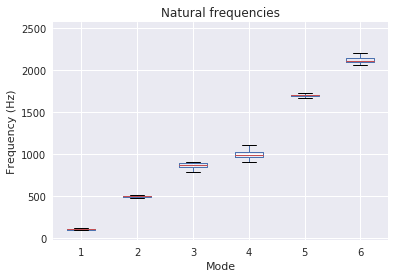

In [4]:
freq = data.drop(['error', 'finished', 'time_minutes', 'nPop'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

### Grouping by population size

In [16]:
errors = data.drop(['finished', 'time_minutes'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors.groupby('nPop').describe()

error                                                              \
     count      mean       std       min       25%       50%       75%   
nPop                                                                     
20    10.0  7.789004  1.293563  5.458967  7.474727  8.048301  8.268067   
40    10.0  6.692345  1.065372  5.191150  6.092604  6.603731  7.121037   
60    10.0  6.529848  0.924540  4.948880  5.859478  6.498770  7.263013   
80    10.0  6.237942  0.828876  4.847637  5.816249  6.331953  6.862696   
100   10.0  6.534203  0.491187  5.795500  6.314501  6.539587  6.800560   

                
           max  
nPop            
20    9.863962  
40    9.043175  
60    7.946914  
80    7.262622  
100   7.463373

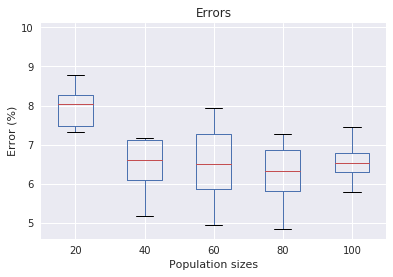

In [10]:
errors.boxplot(column='error', by='nPop')
plt.suptitle("")
plt.title("Errors")
plt.xlabel("Population sizes")
plt.ylabel("Error (%)")
plt.show()

In [20]:
times = data.drop(['finished', 'error'], axis=1)
times.drop([x for x in times.columns if type(x)==int], axis=1, inplace=True)

times.groupby('nPop').describe()

time_minutes                                                        \
            count       mean       std        min        25%        50%   
nPop                                                                      
20           10.0  10.145964  1.012807   8.790546   9.314269  10.104508   
40           10.0  19.987297  1.955169  16.277406  19.278469  20.092467   
60           10.0  29.530944  2.967009  25.064945  27.991194  29.648999   
80           10.0  38.889179  3.289265  34.582274  36.695850  38.666130   
100          10.0  48.836489  4.933888  42.799320  44.641280  48.098203   

                            
            75%        max  
nPop                        
20    10.792406  11.657213  
40    20.593736  23.728437  
60    31.381820  34.994010  
80    40.718711  45.064695  
100   52.465360  56.858075

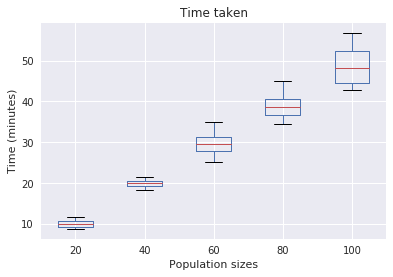

In [21]:
times.boxplot(column='time_minutes', by='nPop')
plt.suptitle("")
plt.title("Time taken")
plt.xlabel("Population sizes")
plt.ylabel("Time (minutes)")
plt.show()